#  Iris Data Set 
http://archive.ics.uci.edu/ml/datasets/Iris

### Data Set Information:

This is perhaps the best known database to be found in the pattern recognition literature. Fisher's paper is a classic in the field and is referenced frequently to this day. (See Duda & Hart, for example.) The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. One class is linearly separable from the other 2; the latter are NOT linearly separable from each other. 

### Attribute Information:

1. sepal length in cm
2. sepal width in cm
3. petal length in cm
4. petal width in cm
5. class:
-- Iris Setosa
-- Iris Versicolour
-- Iris Virginica

In [1]:
import numpy as np
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn import datasets
import matplotlib.pyplot as plt

In [2]:
iris = datasets.load_iris()

X = iris.data
y = iris.target

df = pd.DataFrame(iris.data)
df[4] = y
df.columns = ['sepal length (cm)',
             'sepal width (cm)',
             'petal length (cm)',
             'petal width (cm)', 'type']

df.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   type  
0     0  
1     0  
2     0  
3     0  
4     0

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

mlp = MLPClassifier(activation='relu', solver='sgd', hidden_layer_sizes=(5), 
                   learning_rate_init=0.2, max_iter=10000, learning_rate='adaptive')

mlp.fit(X_train, y_train)

mlp.score(X_test, y_test)

0.2631578947368421

In [4]:
mlp.predict(X_test)

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

0.2631578947368421
0.2631578947368421
0.2631578947368421


/home/mario/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.9736842105263158
0.2631578947368421
0.9736842105263158
1.0
0.9736842105263158
0.2631578947368421
0.9473684210526315
1.0
1.0
0.2631578947368421
0.9473684210526315
1.0
0.9736842105263158
34
23
27
500
56
136
144
353
17
202
153
345
23
63
102
229


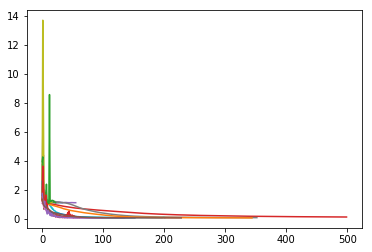

In [5]:
hidden_layer_sizes = [(10,2), (10), (5,5), (20,10)]
learning_rate_init = [0.5, 0.2, 0.1, 0.01]

classifiers = []

for layers in hidden_layer_sizes:
    for lri in learning_rate_init: 
        classifiers.append(MLPClassifier(activation='relu', solver='adam', hidden_layer_sizes=layers, 
                                         learning_rate_init=lri, max_iter=500, learning_rate='adaptive'))


for clf in classifiers:
    clf.fit(X_train, y_train)
    print(clf.score(X_test, y_test))
    
for clf in classifiers:
    print(len(clf.loss_curve_))
    plt.plot(clf.loss_curve_)
    
plt.show()

In [6]:
#parametri che voglio testare tramite ricerca esaustiva con GridSearchCV 
params = {
    'hidden_layer_sizes': [(10,2), (10), (5,5), (20,10)],
    'learning_rate_init' : [0.5, 0.2, 0.1, 0.01,]
}

#MLP di partenza
mlp = MLPClassifier(activation='relu', solver='sgd', max_iter=10000, learning_rate='adaptive')

#testo i diversi parametri con 5-fold cross validation 
clf = GridSearchCV(mlp, params, n_jobs=-1, cv=5, )
#clf.fit(X, y)

#print("Best estimator: ", clf.best_estimator_)

#testo ogni stimatore 
scores = cross_val_score(clf, X, y, cv=3)
print("\nAccuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

/home/mario/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/home/mario/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/home/mario/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)



Accuracy: 0.78 (+/- 0.63)


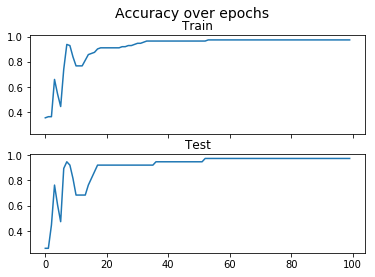

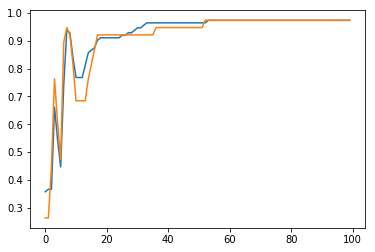

In [7]:
mlp = MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=10, learning_rate='adaptive',
       learning_rate_init=0.01, max_iter=10000, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='sgd', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)


N_TRAIN_SAMPLES = X_train.shape[0]
N_EPOCHS = 100
N_CLASSES = np.unique(y_train)

scores_train = []
scores_test = []

epoch = 0
for epoch in range(N_EPOCHS):
    mlp.partial_fit(X_train, y_train, classes=N_CLASSES)

    scores_train.append(mlp.score(X_train, y_train))

    scores_test.append(mlp.score(X_test, y_test))


fig, ax = plt.subplots(2, sharex=True, sharey=True)
ax[0].plot(scores_train)
ax[0].set_title('Train')
ax[1].plot(scores_test)
ax[1].set_title('Test')
fig.suptitle("Accuracy over epochs", fontsize=14)
plt.show()
plt.plot(scores_train)
plt.plot(scores_test)
plt.show()

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

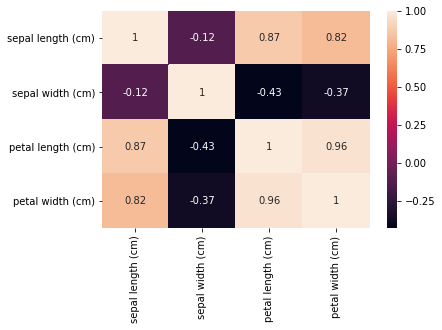

In [9]:
sns.heatmap(df[df.columns[:-1]].corr(), annot = True)
plt.show()

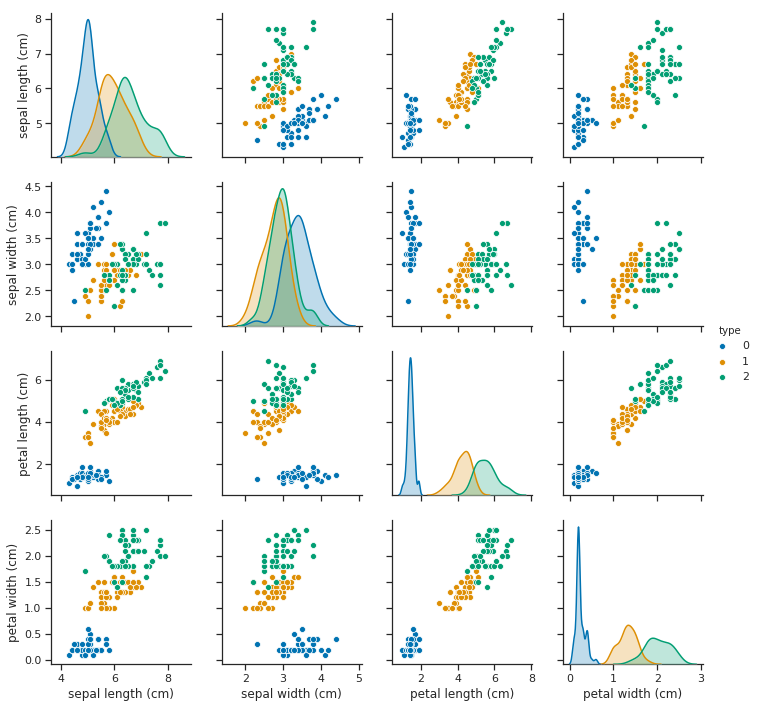

In [10]:
import seaborn as sns; sns.set(style="ticks", color_codes=True)
 
sns.pairplot(df, palette="colorblind", diag_kind="kde", hue='type', x_vars=df.columns[:-1], y_vars=df.columns[:-1])
plt.show()

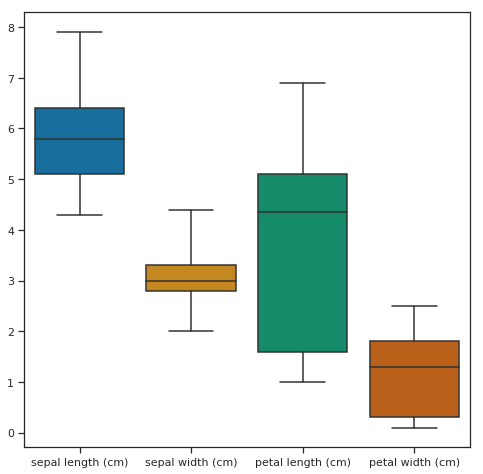

In [11]:
plt.figure(figsize=(8,8))
sns.boxplot(data=df.iloc[:,:-1], palette='colorblind', orient='v', whis='range')
plt.show()

In [12]:
import matplotlib.patheffects as PathEffects
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

In [13]:
def scatter(x, labels):
    palette = np.array(sns.color_palette("colorblind", 3))

    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot()
    sc = ax.scatter(x[:,0], x[:,1], c=palette[list(labels)], alpha=0.7)
    
    ax.axis('off')

    txts = []
    for i in range(3):
        # Ogni label viene posta nella mediana dei punti corrispondenti.
        xtext, ytext = np.median(x[labels == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(iris.target_names[i]), fontsize=18)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)
    
    return f, ax, sc, txts

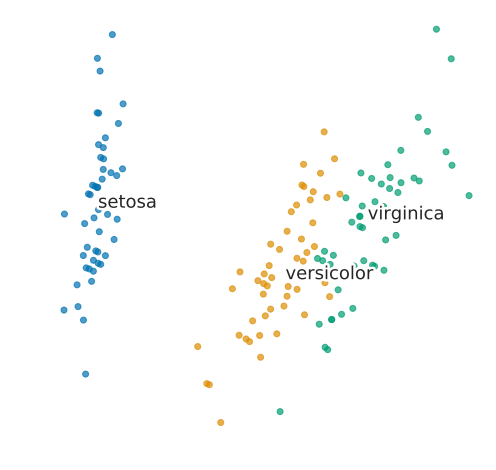

In [14]:
fig_pca, ax_pca, _, _ = scatter(X_pca, y.astype(int))
plt.show()

In [15]:
from sklearn.manifold import TSNE

X_tsne = TSNE().fit_transform(X)

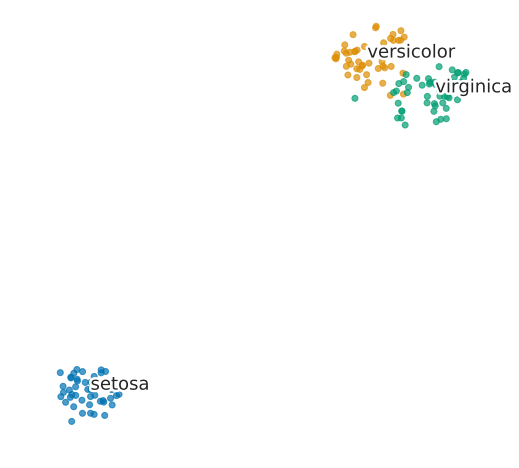

In [16]:
fig_tsne, ax_tsne, _, _ = scatter(X_tsne, y.astype(int))
plt.show()